In [1]:
import pandas as pd
import numpy as np

In [2]:
import nltk

In [3]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>


False

In [4]:
import re

In [5]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [6]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


def preprocess_text(text):
    # Remove HTML tags (if any)
    text = re.sub(r"<.*?>", "", text)
    
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Remove punctuation
    tokens = [token for token in tokens if token.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    # print(filtered_tokens)
    # # Lemmatization
    # lemmatizer = WordNetLemmatizer()
    # lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a single string
    processed_text = " ".join(filtered_tokens)

    
    return processed_text

In [7]:
# amazon=pd.read_csv("Eco_Friendly_Products_Test_Full.xlsx - Sheet1.csv")
amazon=pd.read_csv("Amazon Reviews Validation Data_1.csv")
# amazon=pd.read_csv("amazon_neg.csv")

In [8]:
amazon

,Reviews,Aspect
0,The settings are perfect for all hair types,Adaptability
1,with lots of settings,Adaptability
2,heating element has died,Durability
3,"Also, the diffuser does not stay on at all.",Ease of Use
4,and it won't stay on it at all. Just flys off....,Ease of Use
...,...,...
1176,top no longer stays on.,Performance
1177,unfortunately one of the lids does not fit at all,Performance
1178,"cheap enough that if my husband loses one, we ...",Price
1179,economical price,Price


In [9]:
# a=amazon["Review"]
a=amazon["Reviews"]

In [10]:
q=amazon["Aspect"]

In [11]:
all_values = q.str.split(',').explode()

In [12]:
unique_values = all_values.unique()

In [13]:
len_aspect=len(unique_values)

In [14]:
len_aspect

12

In [15]:
processed_series = a.apply(preprocess_text)

In [16]:
processed_series

0                             settings perfect hair types
1                                           lots settings
2                                    heating element died
3                                      also diffuser stay
4                               wo stay flys see one work
                              ...                        
1176                                     top longer stays
1177                           unfortunately one lids fit
1178                cheap enough husband loses one wo cry
1179                                     economical price
1180    also way seal drinking hole car hit bump stop ...
Name: Reviews, Length: 1181, dtype: object

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
# Step 2: Convert text to numerical vectors using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_series).toarray()

In [19]:
# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the documents and transform the documents into TF-IDF vectors
tfidf_vectors = vectorizer.fit_transform(processed_series).toarray()

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [21]:
num_clusters = 12

# Cluster for 12 aspects

In [22]:
num_clusters = 12

In [23]:
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
word_vectors = normalize(X) 
centroids = word_vectors[np.random.choice(word_vectors.shape[0], num_clusters, replace=False), :]


kmeans = KMeans(n_clusters=num_clusters, random_state=0)
labels = kmeans.fit_predict(word_vectors)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
# Create DataFrame
df = pd.DataFrame({
    'Sentence': processed_series,
    'Cluster': labels
})

# Show the DataFrame
print(df)

                                               Sentence  Cluster
0                           settings perfect hair types        8
1                                         lots settings        8
2                                  heating element died        8
3                                    also diffuser stay        8
4                             wo stay flys see one work        8
...                                                 ...      ...
1176                                   top longer stays        8
1177                         unfortunately one lids fit        8
1178              cheap enough husband loses one wo cry        8
1179                                   economical price        8
1180  also way seal drinking hole car hit bump stop ...        8

[1181 rows x 2 columns]


Best GMM for Glove Vectors: GaussianMixture(n_components=24, random_state=0)
Summary: Means - [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.01820802 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]], Covariances - [[[1.00000000e-06 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 1.00000000e-06 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.00000000e-06 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e-06
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00

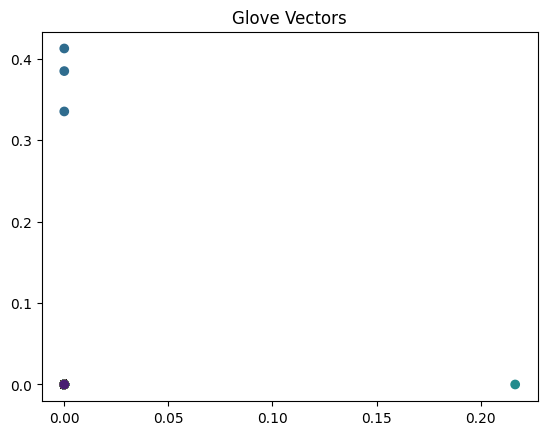

In [25]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming glove_vector and word_vectors are NumPy arrays
# Replace these with your actual data
glove_vector = tfidf_vectors

# Function to fit the model and plot results
def fit_and_plot(data, title):
    best_gmm = None
    best_score = float('-inf')
    for n_components in range(3, 25):
        gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
        gmm.fit(data)
        score = gmm.bic(data)
        if score > best_score:
            best_score = score
            best_gmm = gmm

    print(f'Best GMM for {title}: {best_gmm}')
    print(f'Summary: Means - {best_gmm.means_}, Covariances - {best_gmm.covariances_}')

    plt.figure()
    plt.scatter(data[:, 0], data[:, 1], c=best_gmm.predict(data))
    plt.title(title)
    plt.show()

# Fit and plot for glove_vector and word_vectors
fit_and_plot(glove_vector, 'Glove Vectors')



Best GMM for Glove Vectors: GaussianMixture(n_components=12, random_state=0)
Summary: Means - [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02752117 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.0151509 ]], Covariances - [[[1.00000000e-06 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 1.00000000e-06 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.00000000e-06 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e-06
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00

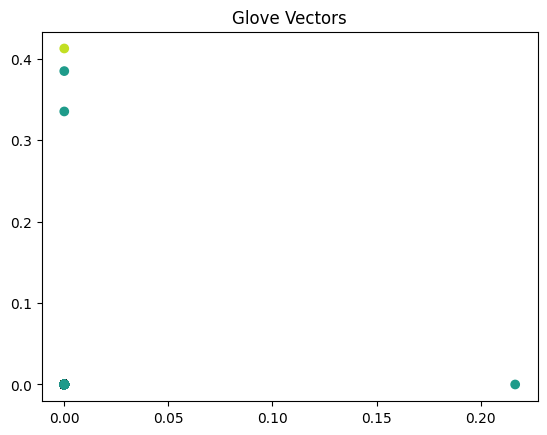

In [26]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming glove_vector and word_vectors are NumPy arrays
# Replace these with your actual data
glove_vector = X

# Function to fit the model and plot results
def fit_and_plot(data, title):
    best_gmm = None
    best_score = float('-inf')
    for n_components in range(3, 13):
        gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
        gmm.fit(data)
        score = gmm.bic(data)
        if score > best_score:
            best_score = score
            best_gmm = gmm

    print(f'Best GMM for {title}: {best_gmm}')
    print(f'Summary: Means - {best_gmm.means_}, Covariances - {best_gmm.covariances_}')

    plt.figure()
    plt.scatter(data[:, 0], data[:, 1], c=best_gmm.predict(data))
    plt.title(title)
    plt.show()

# Fit and plot for glove_vector and word_vectors
fit_and_plot(glove_vector, 'Glove Vectors')



Best GMM for Glove Vectors: GaussianMixture(n_components=6, random_state=0)
Summary: Means - [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.0002439  0.00127624 0.00070161 ... 0.00041103 0.00156924 0.00104077]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]], Covariances - [[[ 1.00000000e-06  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  1.00000000e-06  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  1.00000000e-06 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.00000000e-06
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00 

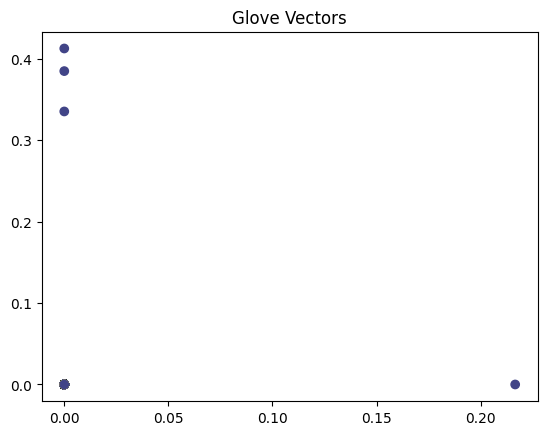

In [27]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming glove_vector and word_vectors are NumPy arrays
# Replace these with your actual data
glove_vector = tfidf_vectors

# Function to fit the model and plot results
def fit_and_plot(data, title):
    best_gmm = None
    best_score = float('-inf')
    for n_components in range(3, 7):
        gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
        gmm.fit(data)
        score = gmm.bic(data)
        if score > best_score:
            best_score = score
            best_gmm = gmm

    print(f'Best GMM for {title}: {best_gmm}')
    print(f'Summary: Means - {best_gmm.means_}, Covariances - {best_gmm.covariances_}')

    plt.figure()
    plt.scatter(data[:, 0], data[:, 1], c=best_gmm.predict(data))
    plt.title(title)
    plt.show()

# Fit and plot for glove_vector and word_vectors
fit_and_plot(glove_vector, 'Glove Vectors')



# ploting

In [28]:
import plotly.express as px
import plotly.io as pio
# pio.renderers.default = "browser"

In [29]:
from sklearn.manifold import TSNE

perplexity_value = min(30, len(word_vectors) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors_2d = tsne.fit_transform(word_vectors)

In [30]:
import plotly.graph_objects as go
import plotly.io as pio

fig = go.Figure()

for i in range(num_clusters):
    indices = labels == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i + 1}'
    ))

fig.update_layout(
    title='Sentence Clusters Visualized with t-SNE (normal)',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters"
)

pio.show(fig)


In [31]:
import plotly.graph_objects as go

# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(word_vectors) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(word_vectors)

# 3D Scatter plot
fig = go.Figure()

for i in range(num_clusters):
    indices = labels == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters(normal)',
                  scene=dict(xaxis_title='t-SNE Dimension 1',
                             yaxis_title='t-SNE Dimension 2',
                             zaxis_title='t-SNE Dimension 3'))
fig.show()


# kmeans with 6 aspects

In [32]:
num_clusters = 6 # Example number of clusters

In [33]:

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(word_vectors)
labels = kmeans.labels_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



# ploting

In [34]:
perplexity_value = min(30, len(word_vectors) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors_2d = tsne.fit_transform(word_vectors)

In [35]:

fig = go.Figure()

for i in range(num_clusters):
    indices = labels == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i + 1}'
    ))

fig.update_layout(
    title='Sentence Clusters Visualized with t-SNE(normal)',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters"
)

pio.show(fig)


In [36]:

# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(word_vectors) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(word_vectors)

# 3D Scatter plot
fig = go.Figure()

for i in range(num_clusters):
    indices = labels == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters(normal)',
                  scene=dict(xaxis_title='t-SNE Dimension 1',
                             yaxis_title='t-SNE Dimension 2',
                             zaxis_title='t-SNE Dimension 3'))
fig.show()


# GMM

In [37]:
from sklearn.mixture import GaussianMixture

In [38]:
gmm = GaussianMixture(n_components = 12)

In [39]:
gmm_6 = GaussianMixture(n_components = 6)

In [40]:
gmm.fit(word_vectors)

GaussianMixture(n_components=12)

In [41]:
labels = gmm.predict(word_vectors)

# df

In [42]:
# Create DataFrame
df = pd.DataFrame({
    'Sentence': processed_series,
    'Cluster': labels
})

# Show the DataFrame
print(df)

                                               Sentence  Cluster
0                           settings perfect hair types        1
1                                         lots settings        1
2                                  heating element died        1
3                                    also diffuser stay        1
4                             wo stay flys see one work       11
...                                                 ...      ...
1176                                   top longer stays        1
1177                         unfortunately one lids fit       11
1178              cheap enough husband loses one wo cry       11
1179                                   economical price        6
1180  also way seal drinking hole car hit bump stop ...        1

[1181 rows x 2 columns]


# ploting

In [43]:
num_clusters=12

In [44]:


perplexity_value = min(30, len(word_vectors) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors_2d = tsne.fit_transform(word_vectors)

In [45]:

fig = go.Figure()

for i in range(num_clusters):
    indices = labels == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i + 1}'
    ))

fig.update_layout(
    title='Sentence Clusters Visualized with t-SNE(normal)',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters"
)

pio.show(fig)


In [46]:
import plotly.graph_objects as go

# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(word_vectors) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(word_vectors)

# 3D Scatter plot
fig = go.Figure()

for i in range(num_clusters):
    indices = labels == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters(normal)',
                  scene=dict(xaxis_title='t-SNE Dimension 1',
                             yaxis_title='t-SNE Dimension 2',
                             zaxis_title='t-SNE Dimension 3'))
fig.show()


# 6 cluster

In [47]:
gmm_6.fit(nltk)
labels_nltk = gmm_6.predict(nltk)

TypeError: float() argument must be a string or a real number, not 'module'

In [ ]:
gmm_6.fit(word_vectors)
labels = gmm_6.predict(word_vectors)

In [ ]:
num_clusters=6

# ploting

In [ ]:


perplexity_value = min(30, len(word_vectors) - 1)
tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=0)
reduced_vectors_2d = tsne.fit_transform(word_vectors)

In [ ]:

fig = go.Figure()

for i in range(num_clusters):
    indices = labels == i
    fig.add_trace(go.Scatter(
        x=reduced_vectors_2d[indices, 0],
        y=reduced_vectors_2d[indices, 1],
        mode='markers',
        name=f'Cluster {i + 1}'
    ))

fig.update_layout(
    title='Sentence Clusters Visualized with t-SNE(normal)',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2',
    legend_title="Clusters"
)

pio.show(fig)


In [ ]:
import plotly.graph_objects as go

# Perform t-SNE dimensionality reduction for 3D visualization
perplexity_value = min(30, len(word_vectors) - 1)
tsne_3d = TSNE(n_components=3,perplexity=perplexity_value, random_state=0)
reduced_vectors_3d = tsne_3d.fit_transform(word_vectors)
# 3D Scatter plot
fig = go.Figure()

for i in range(num_clusters):
    indices = labels == i
    fig.add_trace(go.Scatter3d(
        x=reduced_vectors_3d[indices, 0],
        y=reduced_vectors_3d[indices, 1],
        z=reduced_vectors_3d[indices, 2],
        mode='markers',
        name=f'Cluster {i+1}'
    ))

fig.update_layout(title='3D Sentence Clusters(normal)',
                  scene=dict(xaxis_title='t-SNE Dimension 1',
                             yaxis_title='t-SNE Dimension 2',
                             zaxis_title='t-SNE Dimension 3'))
fig.show()


In [ ]:
# Create DataFrame
df = pd.DataFrame({
    'Sentence': processed_series,
    'Cluster': labels
})

# Show the DataFrame
print(df)

                                              Sentence  Cluster
0                                 heating element died        5
1                                           attractive        5
2                                           attractive        5
3                         writing left days gets stuck        1
4                          increasingly difficult wipe        4
..                                                 ...      ...
148  little crevices weird shaped areas stuff gets ...        1
149  using paper cup cup coffee work like godless c...        4
150                                 lastly leak issues        5
151                         unfortunately one lids fit        2
152              cheap enough husband loses one wo cry        2

[153 rows x 2 columns]
